In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "figure.dpi": 120,
    "figure.figsize": (10, 6)
})

In [ ]:
hateful_terms = pd.read_csv("1580-1603-dimensionpairs.txt", header=None, sep=";")[0].tolist()

df = pd.read_csv("1580-1603-dimensionpairs-sentences.csv")
df["class"] = df["target"].isin(hateful_terms).map({True: "Hate", False: "Non-Hate"})

df2 = pd.read_csv("pilotdataset-full-1annotator.csv")

Some data manipulation to join training and test set which formats were a little different.

In [24]:
df2_part1 = df2[[
    "target", "sent_id1", "sentence1", "year1", "text1", "hate1"
]].rename(columns={
    "sent_id1": "sent_id",
    "sentence1": "sentence",
    "year1": "year",
    "text1": "text",
    "hate1": "hate"
})

df2_part2 = df2[[
    "target", "sent_id2", "sentence2", "year2", "text2", "hate2"
]].rename(columns={
    "sent_id2": "sent_id",
    "sentence2": "sentence",
    "year2": "year",
    "text2": "text",
    "hate2": "hate"
})

df2 = pd.concat([df2_part1, df2_part2], ignore_index=True).drop_duplicates() # the dataset re-use sentences to make other comparisons, so we drop duplicates ()

df2["class"] = np.where(df2["hate"] > 0, "Hate", "Non-Hate")
df2 = df2.drop(columns="hate")

df = pd.concat([df2, df], ignore_index=True)

In [26]:
df.columns

Index(['target', 'sent_id', 'sentence', 'year', 'text', 'class'], dtype='object')

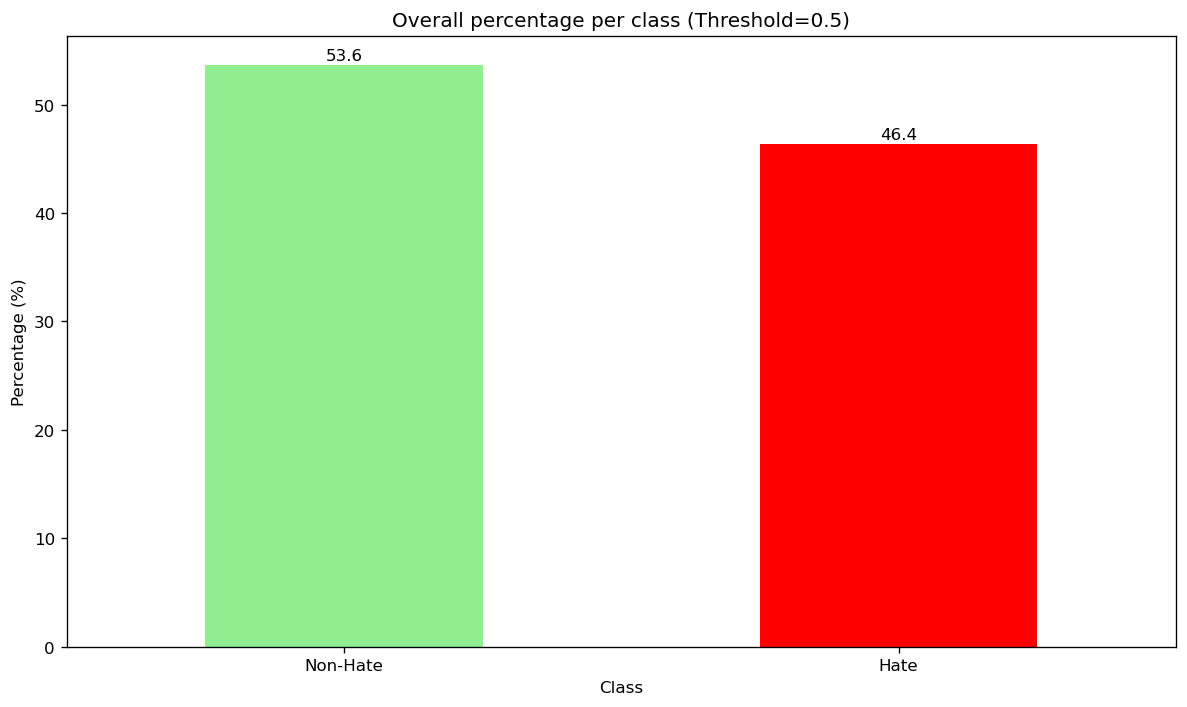

In [ ]:
# Cell 5: overall percentage of the two classes
class_percent = df["class"].value_counts(normalize=True).reindex(["Non-Hate","Hate"]).fillna(0) * 100
colors = {"Hate":"red", "Non-Hate":"lightgreen"}

plt.figure()
class_percent.plot(kind="bar", color=[colors[c] for c in class_percent.index])
plt.title("Overall percentage per class")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)
for i, v in enumerate(class_percent):
    plt.text(i, v + 0.5, f"{v:.1f}", ha="center")
plt.tight_layout()
plt.show()

class,Hate,Non-Hate
year,,
1530,0,2
1531,0,6
1532,2,44
1533,0,58
1534,2,64


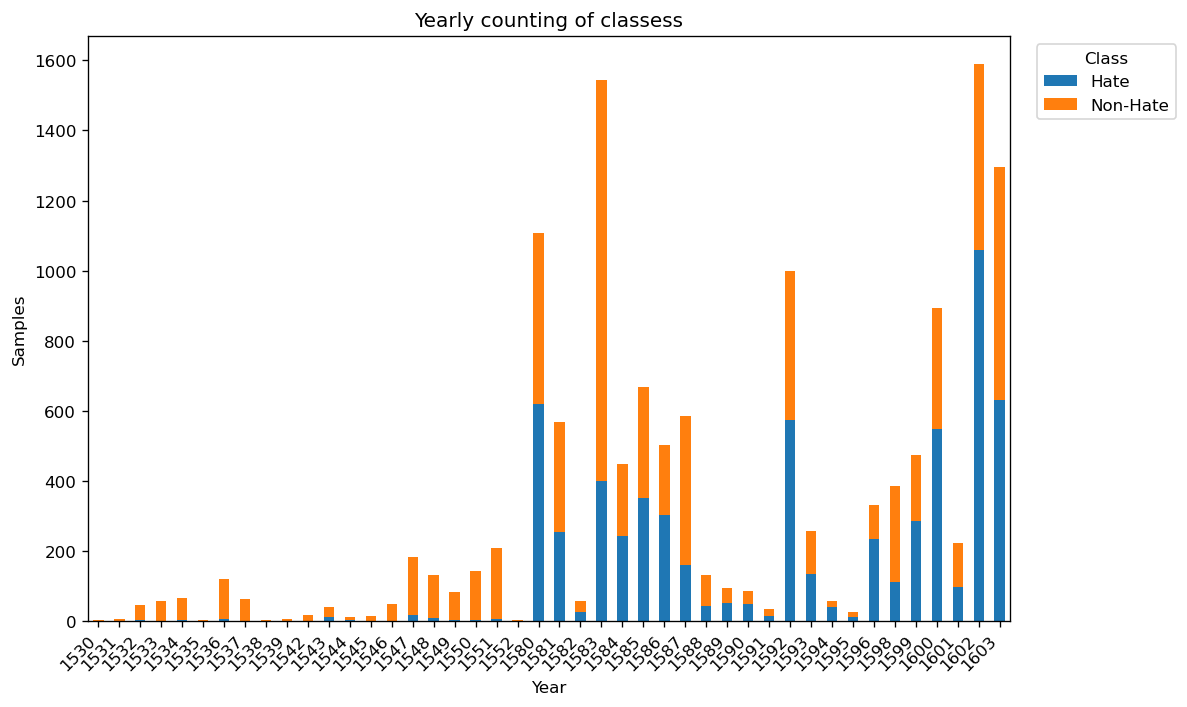

In [ ]:
# Cell 6: yearly counts and stacked bar (each year shows counts per class)
monthly_counts = df.groupby(["year", "class"]).size().unstack(fill_value=0).sort_index()

# Plot stacked bar
monthly_counts.plot(kind="bar", stacked=True)
plt.title("Yearly counting of classess")
plt.xlabel("Year")
plt.ylabel("Samples")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()


There are too many words to show them on the chart.